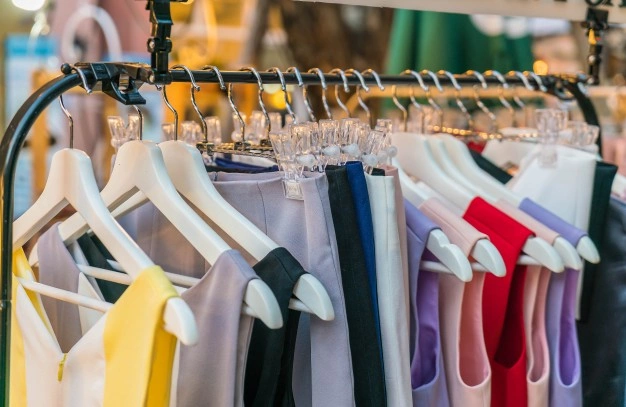

**Image credit:** [Freepik](https://www.freepik.com/free-photo/clothes-hang_1240043.htm#page=1&position=0&from_view=detail#&position=0&from_view=detail#position=0)

In [ ]:
import nltk

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud 
from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

from yellowbrick.classifier import PrecisionRecallCurve

import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.express as px
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
%matplotlib inline
fig, ax = plt.subplots()
# fig.set_size_inches(10, 6)
plt.rcParams["figure.figsize"] = (12, 8)  # the size of A4 paper use (11.7, 8.27)
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# !pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

# !pip install -U pandas-profiling --user
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling
from pandas_profiling.report.presentation.flavours.html.templates import create_html_assets

In [ ]:
###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    
        
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')     
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop realted columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)
    
###############################################################################

# To view summary information about the column

def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))
    
###############################################################################

In [ ]:
df0 = pd.read_csv("../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")
df = df0.copy()
df.head()

In [ ]:
df.profile_report()

In [ ]:
first_looking(df)

 **In the proces above, we have prefered to rename the column names.**

In [ ]:
df.head(1)

In [ ]:
df.sample(3)

In [ ]:
df.shape

In [ ]:
df.drop("unnamed:_0", axis=1, inplace=True)
df.head(1)

In [ ]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

In [ ]:
df.describe(include=object).T

In [ ]:
# to find how many unique values numerical features have

for col in df.select_dtypes(include=[np.number]).columns:
  print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

In [ ]:
# to find how many unique values object features have

for col in df.select_dtypes(include="object").columns:
  print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

In [ ]:
plt.figure(figsize=(14, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix)

plt.xticks(rotation=45);

<a id="4.2"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">4.2 - The Examination of Target Variable<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
df.columns

In [ ]:
df.head(2)

In [ ]:
df["recommended_ind"].value_counts()

In [ ]:
df["recommended_ind"].value_counts()

In [ ]:
first_look("recommended_ind")

In [ ]:
df["recommended_ind"].describe().T

In [ ]:
sns.countplot(x = df.recommended_ind, data = df)
plt.title('Customer Recommendation Distribution', fontsize=30)
plt.xlabel("Recommendation Label", fontsize=24)
plt.ylabel("The Number of Recommendations", fontsize=24)

for index,value in enumerate(df.recommended_ind.value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

In [ ]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df['recommended_ind'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '0'])
plt.title('Customer Recommendation Distribution', fontsize=20)
plt.axis('off');

In [ ]:
sns.swarmplot(y="age", x="rating", hue="recommended_ind", data=df, palette="husl");

In [ ]:
sns.swarmplot(y="age", x="division_name", hue="recommended_ind", data=df, palette="husl");

In [ ]:
sns.swarmplot(y="age", x="department_name", hue="recommended_ind", data=df, palette="husl");

In [ ]:
sns.swarmplot(y="age", x="class_name", hue="recommended_ind", data=df, palette="husl");

**The Examination of "rating" Variable**

- "rating" is a Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

In [ ]:
df["rating"].value_counts()

In [ ]:
first_look("rating")

In [ ]:
df["rating"].describe().T

In [ ]:
sns.countplot(x = df.rating, data = df)
plt.title('Customer Rating Distribution', fontsize=30)
plt.xlabel("Rating Label", fontsize=24)
plt.ylabel("The Number of Rating", fontsize=24)

for index,value in enumerate(df.rating.value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

In [ ]:
plt.figure(figsize=(8, 8))

explode = [0.1, 0, 0, 0, 0.1]
plt.pie(df['rating'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '2', '3', '4','5'])
plt.title('Customer Rating Distribution', fontsize=20)
plt.axis('off');

**The Examination of "age" Variable**

- "age" is a Positive Integer variable of the reviewers age.

In [ ]:
df["age"].value_counts()

In [ ]:
first_look("age")

In [ ]:
df["age"].describe().T

In [ ]:
plt.figure(figsize = (20, 8))
plt.title('Customer Age Distribution', fontsize=30)
plt.xlabel("Age", fontsize=24)
plt.ylabel("The Number of Customer Age", fontsize=18)

sns.histplot(df, x='age', kde = True, bins = 50);

In [ ]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = df, x = "age", y = "recommended_ind", ax=ax)

plt.title('Customer Age Distribution By Recommendations', fontsize=30)
plt.xlabel("Age", fontsize=24)
plt.ylabel("Customer Recommendation Ratio", fontsize=18)
plt.xticks(rotation = 45);

In [ ]:
fig = px.histogram(df['age'], color=df['recommended_ind'],
                   labels={'value': 'Age', 'color': 'Recommended'}, 
                   color_discrete_map={0: "magenta", 1: "MediumPurple"},
                   marginal='box')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Age and Recommendation',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='overlay')
fig.show()

**The Examination of "positive_feedback_count" Variable**

- "positive_feedback_count" is Positive Integer documenting the number of other customers who found this review positive.

In [ ]:
df["positive_feedback_count"].value_counts()

In [ ]:
first_look("positive_feedback_count")

In [ ]:
df["positive_feedback_count"].describe().T

In [ ]:
plt.figure(figsize = (20, 8))
plt.title('Customer Positive Feedback Distribution', fontsize=20)
plt.xlabel("Customer Positive Feedback", fontsize=24)
plt.ylabel("The Number of Customer Positive Feedback", fontsize=18)

sns.histplot(df, x='positive_feedback_count', kde = True, bins = 50);

In [ ]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = df, x = "positive_feedback_count", y = "age", ax=ax)

plt.xlabel("Customer Positive Feedback", fontsize=24)
plt.ylabel("Age", fontsize=24)

plt.title('Customer Positive Feedback Distribution By Age', fontsize=30)
plt.xticks(rotation = 45);

In [ ]:
df.columns

**The Examination of "division_name" Variable**

- "division_name" is Categorical name of the product high level division.

In [ ]:
df["division_name"].value_counts()

In [ ]:
first_look("division_name")

In [ ]:
df["division_name"].describe().T

In [ ]:
g = sns.catplot( x='division_name',
             kind="count", 
             data=df,
             height=5,
             aspect=2)

plt.title('Division Distribution', fontsize=24)
plt.xlabel("Division Name", fontsize=24)
plt.ylabel("The Number of Divisions", fontsize=20)

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.28, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

In [ ]:
plt.figure(figsize=(8, 8))

explode = [0.1, 0.1, 0]
plt.pie(df['division_name'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '2', '3'])
plt.title('Division Distribution', fontsize=20)
plt.axis('off');

In [ ]:
g = sns.catplot(data = df, x ="division_name", hue = "recommended_ind", kind='count', height=5, aspect=2, legend_out=False)

plt.title('Division Distribution By Recommendation', fontsize=24)
plt.xlabel("Division Name By Recommendation", fontsize=20)
plt.ylabel("The Number of Divisions", fontsize=20)
plt.legend(title='Recommendation Indicator', loc='upper left', labels=['Not Recomnended', 'Recomnended'])

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.12, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

In [ ]:
g = sns.catplot(data = df, x ="rating", hue = "division_name", kind='count', height=5, aspect=2, legend_out=False)

plt.title('Rating Distribution By Division', fontsize=24)
plt.xlabel("Ratings By Division", fontsize=20)
plt.ylabel("The Number of Ratings", fontsize=20)
plt.legend(title='Division Name', loc='upper left', labels=['Intimates', 'General', 'General Petite'])

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.04, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

**The Examination of "department_name" Variable**

- "department_name" is a Categorical variable of the product department name.

In [ ]:
df["department_name"].value_counts()

In [ ]:
first_look("department_name")

In [ ]:
df["department_name"].describe().T

In [ ]:
g = sns.catplot(data = df, x ="department_name", kind='count', height=5, aspect=2)

plt.title('Department Distribution', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of Departments", fontsize=20)

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.28, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

In [ ]:
plt.figure(figsize=(8, 8))

explode = [0.1, 0, 0, 0, 0, 0]
plt.pie(df['department_name'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['Tops', 'Dresses', 'Bottoms', 'Intimate', 'Jackets', 'Trend'])
plt.title('Department Distribution', fontsize=20)
plt.axis('off');

In [ ]:
g = sns.catplot(data = df, x ="department_name", hue = "recommended_ind", kind='count', height=7, aspect=2.5, legend_out=False)

plt.title('Department Distribution By Recommendation', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of Recommendations", fontsize=20)
plt.legend(title='Recommendation Indicator', loc='upper left', labels=['Not Recomnended', 'Recomnended'], fontsize='x-large', title_fontsize='24')

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.12, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

In [ ]:
g = sns.catplot(data = df, x ="rating", hue = "department_name", kind='count', height=10, aspect=2.5, legend_out=False)

plt.title('Department Distribution By Recommendation', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of Recommendations", fontsize=20)
plt.legend(title='Department Name', loc='upper left', labels=['Intimates', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend'], fontsize='x-large', title_fontsize='24')
plt.figure(figsize=(15, 8))

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.025, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

**The Examination of "class_name" Variable**

- "class_name" is a Categorical variable of the product class name.

In [ ]:
df["class_name"].value_counts()

In [ ]:
first_look("class_name")

In [ ]:
df["class_name"].describe().T

In [ ]:
plt.title('Product Class Distribution', fontsize=25)
df["class_name"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(16, 16));

In [ ]:
g = sns.catplot(data = df, x ="department_name", hue = "rating", kind='count', height=10, aspect=2.5)

sns.set(rc = {'figure.figsize':(30, 12)})
plt.title('Department Distribution By Rating', fontsize=30)
plt.xlabel("Department Name", fontsize=24)
plt.ylabel("The Number of Ratings", fontsize=24)
plt.legend(title='Rating Label', loc='upper left', labels=['1', '2', '3', '4', '5'], fontsize='x-large', title_fontsize='24')

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.02, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large', fontsize = 18)

plt.show()

In [ ]:
FreqOfWords = df['review_text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0, width=1000, height=600)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (Before Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

**Let's create categorical and numerical sets for the examination of crosstab information.**

In [ ]:
df_cat = df[['division_name', 'department_name', 'class_name', "recommended_ind"]]
df_cat["recommended_ind"] = df_cat["recommended_ind"].apply(lambda x: "Recommended" if x>=1 else "Not Recommended")
df_cat.rename({'division_name': 'Division Name', 'department_name': 'Department Name', 'class_name': 'Class Name', 'recommended_ind': 'Recommendation Indicator'}, axis=1, inplace=True)
df_cat

In [ ]:
df_num = df[['age', 'rating', 'positive_feedback_count', 'recommended_ind']]
df_num["recommended_ind"] = df_num["recommended_ind"].apply(lambda x: "Recommended" if x>=1 else "Not Recommended")
df_num.rename({'age': 'Age', 'rating': 'Rating', 'positive_feedback_count': 'Positive Feedback', 'recommended_ind': 'Recommendation Indicator'}, axis=1, inplace=True)
df_num

In [ ]:
for i, col in enumerate(df_cat.columns):
    xtab = pd.crosstab(df_cat[col], df_cat["Recommendation Indicator"], normalize=True)
    print(colored('-'*55, 'red', attrs=['bold']), sep='')
    print(xtab*100)

In [ ]:
for i, col in enumerate(df_num.columns):
    xtab = pd.crosstab(df_num[col], df_num["Recommendation Indicator"], normalize=True)
    print(colored('-'*55, 'red', attrs=['bold']), sep='')
    print(xtab*100)

<a id="5"></a>
## <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">5) FEATURE SELECTION & DATA CLEANING<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

From now on, the DataFrame we will work with should contains two columns: **"Review Text"** and **"Recommended IND"**. We can do the missing value detection operations from now on.

<a id="5.1"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">5.1 Feature Selection<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
df.columns

**For later parts of the analysis, we will drop unnecassary columns for NLP.**

In [ ]:
df.drop(['clothing_id', 'age', 'title', 'rating',
       'positive_feedback_count', 'division_name',
       'department_name', 'class_name'], axis=1, inplace=True)

In [ ]:
df.head(3)

<a id="5.2"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">5.2 Detecting & Handling With Missing Values<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
df['review_text'].isnull().value_counts()

In [ ]:
df['recommended_ind'].isnull().value_counts()

In [ ]:
df.info()

In [ ]:
df = df.dropna()

In [ ]:
df.info()

In [ ]:
df['review_text'].isnull().value_counts()

In [ ]:
df['recommended_ind'].isnull().value_counts()

In [ ]:
missing_values(df)

**Sometimes we cannot detect missing values if they consist of empty (blank) string such as " ". In this situation we can use the following syntax.** 

In [ ]:
blanks = []  # start with an empty list

for rv in df.itertuples(): # iterate over the DataFrame
    if type(rv)==str and rv.isspace(): # avoid NaN values and test 'review' for whitespace
        blanks.append(i)
blanks

In [ ]:
df["review_text"].str.isspace().sum()

In [ ]:
df[df["review_text"].str.isspace() == True].index

<a id="6"></a>
## <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">6) TEXT MINING<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

<a id="6.1"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">6.1 Tokenization, Noise Removal & Lexicon Normalization<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
def cleaning_fsa(data):
    
    import re
    #1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]','', data)
         
    #2. Tokenize
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
text = cleaning_fsa(str(df["review_text"]))
text

In [ ]:
df["review_text"] = df["review_text"].apply(cleaning_fsa)
df["review_text"].head()

In [ ]:
df.head(3)

<a id="6.2"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">6.2 Handling With Rare Words<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
" ".join(df["review_text"]).split()

In [ ]:
word_values = pd.Series(" ".join(df["review_text"]).split()).value_counts()
word_values

In [ ]:
rare_words = word_values[word_values <= 2]
rare_words

In [ ]:
rare_words.value_counts()

In [ ]:
len(rare_words)

In [ ]:
rare_words.index

In [ ]:
df["review_text"] = df["review_text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df["review_text"].head()

In [ ]:
df.info()

In [ ]:
df.head(3)

<a id="7.1"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">7.1 The Detection of Positive and Negative Reviews<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
df.columns

In [ ]:
df[df["recommended_ind"] == 0]

In [ ]:
df[df["recommended_ind"] == 1]

In [ ]:
df["recommended_ind"].value_counts()

<a id="7.2"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">7.2 The Collection of Positive and Negative Words<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

### Collect Words (positive and negative separately)

In [ ]:
" ".join(df["review_text"]).split()

In [ ]:
neg_words = " ".join(df[df["recommended_ind"] == 0].review_text).split()
neg_words 

In [ ]:
pos_words =" ".join(df[df["recommended_ind"] == 1].review_text).split()
pos_words

<a id="7.3"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">7.3 Creating of Word Cloud<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

**Let's create Word Cloud for most common words in recommended not recommended reviews separately.**

In [ ]:
review_text = df["review_text"]

In [ ]:
all_words = " ".join(review_text)

In [ ]:
all_words[:100]

In [ ]:
from wordcloud import WordCloud 

wordcloud = WordCloud(background_color="white", max_words =250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
wordcloud = WordCloud(background_color="white", max_words =250, colormap='gist_heat').generate(str(neg_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
wordcloud = WordCloud(background_color="white", max_words =250, colormap='cool').generate(str(pos_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<a id="8.1"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">8.1 Train | Test & Split<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df["review_text"]
y= df["recommended_ind"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
type(X_train_count)

In [ ]:
X_train_count.toarray()

In [ ]:
vectorizer.get_feature_names()

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

<a id="8.2.b"></a>
<font color="lightseagreen" size=+0.5><b>8.2.b TF-IDF Vectorization</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

**Before diving into modelling, we will create a User-Defined-Function for comparing models at the end.**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    fig, ax = plt.subplots(figsize=(8, 8))
    
    plot_confusion_matrix(model, X_test, y_test, ax=ax)

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

In [ ]:
print("LOG MODEL")

eval(log, X_train_count, X_test_count)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
                            LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
log_AP_count = viz.score_

<a id="9.1.b"></a>
<font color="lightseagreen" size=+0.5><b>9.1.b Logistic Regression With TF-IDF Vectorizer</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

log.fit(X_train_tf_idf,y_train)

In [ ]:
print("LOG MODEL")

eval(log, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
                            LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced"),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
log_AP_tfidf = viz.score_

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

In [ ]:
print("NB MODEL")

eval(nb, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_count_rec = scores
    elif i == "f1-1":
        nb_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
nb_AP_count = viz.score_

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

In [ ]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_tfidf_rec = scores
    elif i == "f1-1":
        nb_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
nb_AP_tfidf = viz.score_

In [ ]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

In [ ]:
print("SVC MODEL")

eval(svc, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
                            LinearSVC(C=0.01, class_weight="balanced", random_state=101),
                            classes=svc.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
svc_AP_count = viz.score_

<a id="9.3.b"></a>
<font color="lightseagreen" size=+0.5><b>9.3.b Support Vector Machine (SVM) With TF-IDF Vectorizer</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)

svc.fit(X_train_tf_idf, y_train)

In [ ]:
print("SVC MODEL")

eval(svc, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
                            LinearSVC(C=0.01, class_weight="balanced", random_state=101),
                            classes=svc.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
svc_AP_tfidf = viz.score_

<a id="9.4"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">9.4 Random Forest<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

<a id="9.4.a"></a>
<font color="lightseagreen" size=+0.5><b>9.4.a Random Forest With Count Vectorizer</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

In [ ]:
print("RF MODEL")

eval(rf, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
                            RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced"),
                            classes=rf.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
rf_AP_count = viz.score_

<a id="9.4.b"></a>
<font color="lightseagreen" size=+0.5><b>9.4.b Random Forest With TF-IDF Vectorizer</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")

rf.fit(X_train_tf_idf, y_train)

In [ ]:
print("RF MODEL")

eval(rf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
                            RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced"),
                            classes=rf.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
rf_AP_tfidf = viz.score_

<a id="9.5"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">9.5 Ada Boosting<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

<a id="9.5.a"></a>
<font color="lightseagreen" size=+0.5><b>9.5.a Ada Boosting With TF-IDF Vectorizer</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

In [ ]:
print("Ada MODEL")

eval(ada, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_count_rec = scores
    elif i == "f1-1":
        ada_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
                            AdaBoostClassifier(n_estimators= 500, random_state = 42),
                            classes=ada.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
ada_AP_count = viz.score_

<a id="9.5.b"></a>
<font color="lightseagreen" size=+0.5><b>9.5.b Ada Boosting With TF-IDF Vectorizer</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)

ada.fit(X_train_tf_idf, y_train)

In [ ]:
print("Ada MODEL")

eval(ada, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model =AdaBoostClassifier(n_estimators= 500, random_state = 42)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_tfidf_rec = scores
    elif i == "f1-1":
        ada_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
                            AdaBoostClassifier(n_estimators= 500, random_state = 42),
                            classes=ada.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
ada_AP_tfidf = viz.score_

<a id="10"></a>
## <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">10) DEEP LEARNING MODELLING<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df0 = pd.read_csv('../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
df_dl = df0.copy()
df_dl.head()

In [ ]:
df_dl = df_dl[["Review Text","Recommended IND"]]
df_dl.head()

In [ ]:
df_dl.shape

In [ ]:
df_dl.dropna(inplace = True)

In [ ]:
df_dl.shape

<a id="10.1"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">10.1 Tokenization<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
X = df_dl['Review Text'].values
y = df_dl['Recommended IND'].values

In [ ]:
num_words = 10000 
# We have defined the most frequent 10000 repeated words in corpus for tokenizing. We ignore the rest.

tokenizer = Tokenizer(num_words=num_words) 
# The default values of "filters" are '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'. 
# If you also want to filters the numbers, then just "1234567890" at the end. 

In [ ]:
tokenizer.fit_on_texts(X)

<a id="10.2"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">10.2 Creating Word Index<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
tokenizer.word_index

In [ ]:
len(tokenizer.word_index) 

<a id="10.3"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">10.3 Converting Tokens To Numeric<p>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
np.array(X_num_tokens)

In [ ]:
X[105]

In [ ]:
print(X_num_tokens[105])

In [ ]:
# tokenizer.word_index["The"]
# This code will give you an error since "The" which is not among the most repeated 10000 words was excluded while tokenizing

In [ ]:
tokenizer.word_index["shirt"]

In [ ]:
tokenizer.word_index["exactly"]

<a id="10.4"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">10.4 The Determination of Maximum Number of Tokens<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

**This part is the preparation for padding.**

In [ ]:
num_tokens.mean()

In [ ]:
num_tokens.max() 

In [ ]:
num_tokens.argmax()

In [ ]:
X[16263]

In [ ]:
len(X[16263])

In [ ]:
num_tokens.argmin()

In [ ]:
X[820]

In [ ]:
len(X[820])

<a id="10.5"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">10.5 Fixing Token Counts of All documents (Pad Sequences)<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
len(X_num_tokens[105])

In [ ]:
np.array(X_num_tokens[105])

In [ ]:
len(X_num_tokens[106])

In [ ]:
np.array(X_num_tokens[106])

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]

num_tokens = np.array(num_tokens)

In [ ]:
num_tokens

In [ ]:
max_tokens = 103

In [ ]:
sum(num_tokens < max_tokens) / len(num_tokens)

In [ ]:
sum(num_tokens < max_tokens) # the number of documents which have 103 or less tokens

In [ ]:
len(num_tokens)  # total number of all documents in corpus which is constrained by num_words as 20000

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [ ]:
X_pad.shape

In [ ]:
X_pad[105]

In [ ]:
X_pad[106]

<a id="10.6"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">10.6 Train | Set & Split<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)  

# we have been using stratify to prevent imbalance.

<a id="10.7"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">10.7 Modeling<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 100

In [ ]:
model.add(Embedding(input_dim=num_words,        
                    output_dim=embedding_size,                                       
                    input_length=max_tokens,    
                    name='embedding_layer')) 

In [ ]:
model.add(GRU(units=48, return_sequences=True))  
model.add(GRU(units=24, return_sequences=True)) 
model.add(GRU(units=12)) 
model.add(Dense(1, activation='sigmoid'))  

In [ ]:
optimizer = Adam(learning_rate=0.006)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [ ]:
model.summary() 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 10, restore_best_weights=True)

In [ ]:
pd.Series(y_train).value_counts(normalize=True) 

In [ ]:
weights = {0:82, 1:18}

In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=256, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

In [ ]:
model.save('NLP_Sentiment_Analysis_Project')

<a id="10.8"></a>
### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">10.8 Model Evaluation<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

In [ ]:
model_loss.plot();

In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")  

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# plt.plot([1, 0], [0, 1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, recall_score

DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

<a id="11"></a>
## <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">11) PREDICTION<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

In [ ]:
review1 = "Love this dress"
review2 = "Absolutely wonderful. silky and sexy and comfortable"
review3 = "i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!"
review4 = "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
review5 = 'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'
review6 = 'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.'
review7 = 'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'
review8 = 'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'
review9 =  "if you are at least average height or taller, this may look good on you."
review10 = "sadly will be returning, but i'm sure i will find something to exchange it for!"
review11 = "Cute little dress fits tts. it is a little high waisted. good length for my 5'9 height. i like the dress, i'm just not in love with it. i dont think it looks or feels cheap. it appears just as pictured."
review12 = 'Loved the material, but i didnt really look at how long the dress was before i purchased both a large and a medium. im 5\'5" and there was atleast 5" of material at my feet. the gaps in the front are much wider than they look. felt like the dress just fell flat. both were returned. im usually a large and the med fit better. 36d 30 in jeans'
review13 = "I have been waiting for this sweater coat to ship for weeks and i was so excited for it to arrive. this coat is not true to size and made me look short and squat."
review14 = 'Very comfortable, material is good, cut out on sleeves flattering'
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

**Let's convert reviews above to numeric by tokenizing.**

In [ ]:
tokens = tokenizer.texts_to_sequences(reviews) 

**Let's pad the tokenized reviews.**

In [ ]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

**Let's predict the sentiment of our reviews.**

In [ ]:
mod_pred = model.predict(tokens_pad)

In [ ]:
mod_pred

**Let's create DataFrame for visually a better understanding.**

In [ ]:
df_pred = pd.DataFrame(mod_pred, index=reviews)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)

In [ ]:
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: "Recommended" if x>=0.5 else "Not Recommended")

In [ ]:
df_pred

<a id="12"></a>
## <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">12) COMPARING THE MODELS<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

**Let's visually compare the models' F1 Scores, Recall Scores and Average Precision Score.**

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

<a id="13"></a>
## <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">13) CONCLUSION<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

**In this project we have used sentiment analysis to determine whether the product is recommended or not. We have used different machine learning algorithms to get more accurate predictions and deep learning algorithm for comparing it with machine learning models. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at [Kaggle Website](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews).**

**In general, when we compare the models it's hard to decide which model can be picked up among the ones that have been sharing top 5 since their scores are very close to each other. However, Ada Boosting, Naive Bayes, Deep Learning, SVM and LR's scores interchangeably look like better than other models' scores. There is no simple answer to the question of which one is better; each work better in different data sets and conditions. Each modelling algorithm has some pros and cons to each other. So we could select one of these algorithms in consistent with what we need, accuracy or precision.** 

**NOTE: You can reach a satisfactory article at [Here](http://www.emis.de/journals/RCE/V35/v35n2a03.pdf) for a better understanding of which one, LR or SVM, can be prefered in which conditions and needs.** 

<a id="14"></a>
## <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">14) REFERANCES<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

- https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
- https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
- https://www.researchgate.net/publication/49814836_Problematic_standard_errors_and_confidence_intervals_for_skewness_and_kurtosis
- https://www.researchgate.net/publication/304577646_Young_consumers'_intention_towards_buying_green_products_in_a_developing_nation_Extending_the_theory_of_planned_behavior
- https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/Simon
- https://www.researchgate.net/publication/263372601_Resistance_motivations_trust_and_intention_to_use_mobile_financial_services
- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- https://machinelearningmastery.com/power-transforms-with-scikit-learn/
- https://en.wikipedia.org/wiki/Dummy_variable_(statistics) 
- https://www.displayr.com/what-are-dummy-variables/ 
- https://stattrek.com/multiple-regression/dummy-variables.aspx 
- https://www.statisticshowto.com/dummy-variables/
- https://en.wikipedia.org/wiki/Feature_scaling
- https://www.dataschool.io/comparing-supervised-learning-algorithms/
- https://machinelearningmastery.com/handle-missing-data-python/
- https://www.kaggle.com/kaanboke/the-most-used-methods-to-deal-with-missing-values
- https://www.kaggle.com/karnikakapoor/fetal-health-classification
- https://www.kaggle.com/karnikakapoor/heart-failure-prediction-ann
- https://www.kaggle.com/kaanboke/feature-selection-the-most-common-methods-to-know
- https://www.kaggle.com/kaanboke/the-most-common-evaluation-metrics-a-gentle-intro
- https://www.kaggle.com/kaanboke/beginner-friendly-end-to-end-ml-project-enjoy

<a id="15"></a>
## <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">15) FURTHER READINGS<p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Table of Contents</a>

- Kline, R.B. (2011). Principles and practice of structural equation modeling (5th ed., pp. 3-427). New York:The Guilford Press.
- Edwards, A. (1976). An introduction to linear regression and correlation. W. H. Freeman
- Everitt, B. S.; Skrondal, A. (2010), The Cambridge Dictionary of Statistics, Cambridge University Press.
- https://www.amazon.com/Python-Feature-Engineering-Cookbook-transforming/dp/1789806313/ref=sr_1_1?dchild=1&keywords=feature+engineering+cookbook&qid=1627628487&s=books&sr=1-1
- https://www.amazon.com/Feature-Engineering-Made-Easy-Identify-ebook/dp/B077N6MK5W
- https://www.amazon.com/Feature-Engineering-Selection-Chapman-Science/dp/1032090855/ref=sr_1_1?crid=19T9G95E1W7VJ&dchild=1&keywords=feature+engineering+and+selection+kuhn&qid=1628050948&sprefix=feature+engineering+and+%2Cdigital-text%2C293&sr=8-1
- https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413
- Neural Networks from Scratch in Python (by Kinsley § Kukiela) [external link text](https://nnfs.io/)
- Practical Statistics for Data Scientists (by Bruce & Gedeck) [external link text](https://www.amazon.com/Practical-Statistics-Data-Scientists-Essential/dp/149207294X/ref=sr_1_1?dchild=1&keywords=Practical+Statistics+for+Data+Scientists&qid=1627662007&sr=8-1)
- Applications of Deep Neural Networks(by Jeff Heaton) [external link text](https://arxiv.org/abs/2009.05673)
- Applied Predictive Modeling (by Kuhn & Johnson) [external link text](https://www.amazon.com/Applied-Predictive-Modeling-Max-Kuhn/dp/1461468485/ref=pd_sbs_3/141-4288971-3747365?pd_rd_w=AOIS7&pf_rd_p=3676f086-9496-4fd7-8490-77cf7f43f846&pf_rd_r=MCCHJXWK39VD6VW7RVAR&pd_rd_r=4ffcd1ea-44b9-4f33-b9b3-dc02ee159662&pd_rd_wg=nU1Ex&pd_rd_i=1461468485&psc=1:)
- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (by Aurélien Géron) [external link text](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=sr_1_1?crid=2GV554Q2EKD1E&dchild=1&keywords=hands-on+machine+learning+with+scikit-learn%2C+keras%2C+and+tensorflow&qid=1627628294&s=books&sprefix=hands%2Cstripbooks-intl-ship%2C309&sr=1-1)
- Master Machine Learning Algorithms (by Brownlee, ML algorithms are very well explained ) [external link text](https://machinelearningmastery.com/master-machine-learning-algorithms/)
- Python Feature Engineering Cookbook (by Galli) [external link text](https://www.amazon.com/Python-Feature-Engineering-Cookbook-transforming/dp/1789806313/ref=sr_1_1?dchild=1&keywords=feature+engineering+cookbook&qid=1627628487&s=books&sr=1-1)
- Feature Engineering Made Easy (by Ozdemir & Susarla) [external link text](https://www.amazon.com/Feature-Engineering-Made-Easy-Identify-ebook/dp/B077N6MK5W)
- Feature Engineering and Selection (by Kuhn & Johnson) [external link text](https://www.amazon.com/Feature-Engineering-Selection-Chapman-Science/dp/1032090855/ref=sr_1_1?crid=19T9G95E1W7VJ&dchild=1&keywords=feature+engineering+and+selection+kuhn&qid=1628050948&sprefix=feature+engineering+and+%2Cdigital-text%2C293&sr=8-1)
- Imbalanced Classification with Python(by Brownlee) [external link text](https://machinelearningmastery.com/imbalanced-classification-with-python/)